# Display the Data that Will Be Used as a prior over the HR diagram

Note the cuts are different for the inference, this is to generate a clean sample of what data should look like at high latitudes.

### Data import

I have selected sources with $E(B-V)<0.008$, using the Lenz and SFD maps. I take in the centre of the LENZ map pixels and select regions of $0.134^\circ$.

### Gaia cuts:

**Upper bound cuts**

ruwe_cut=1.4
bp_bound_cut=22
rp_bound_cut=22
g_bound_cut=22
error_over_parallax_cut=0.2

I also make sure parallax is positive.


I calculate mu (distance modulus) and make the cut mu_error/mu<0.01 ----> is this too restrictuve. I am trying to ensure not too much spread in the K band magnitude when learning.


gaia apperant g > 13

absolute 2mass K > 10.0

BPRP colour>0


# magnitude error upper bound
self.mag_err_bound=0.05

### PS1

My PANSTARRS crossmatch is the query "JOIN gaiaedr3.panstarrs1_best_neighbour AS xmatch USING (source_id) \
            JOIN gaiaedr3.panstarrs1_join AS xjoin USING (clean_panstarrs1_oid) \
            JOIN gaiadr2.panstarrs1_original_valid AS psdr1 ON xjoin.original_ext_source_id = psdr1.obj_id"


And I choose sources with 'numbers_of_neighbours<2"

Actually, i have no other quality cuts on the PS1 data other than magnitude error being less than 0.05


### 2MASS

Query: 
JOIN gaiadr3.tmass_psc_xsc_best_neighbour AS xmatch USING (source_id) \
JOIN gaiadr3.tmass_psc_xsc_join AS xjoin USING (clean_tmass_psc_xsc_oid) \
JOIN gaiadr1.tmass_original_valid AS tmass ON xjoin.original_psc_source_id = tmass.designation

"number_of_neighbours"<2

Make a selection cut of AAA quality sources

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('../')

In [2]:
(2624396//32)

82012

In [3]:
import hmac
import matplotlib.pyplot as plt
from src.HMC_Single_Star_cosdist import HMC_Sampler
from src import NF_Cos_dist
import jax.numpy as jnp
import numpy as np
import matplotlib.colors as mcolors
import jax.numpy as jnp
import jax.random as jr
nf=NF_Cos_dist.JaxNormFlow()

/opt/homebrew/Caskroom/miniforge/base/envs/flowjax/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:jax._src.xla_bridge:Unable to initialize backend 'cuda': 
INFO:jax._src.xla_bridge:Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/opt/homebrew/Caskroom/miniforge/base/envs/flowjax/bin/../lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file), '/usr/local/lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache)


8164992
7558434


8164992 stars original
2624396 post cut

# Analyse Data

### The next plot displays the K band absolute magnitude (inferred from low(ish) error Gaia parallax and 2Mass apperant mag) with each of the features that I currently use on the x axis. Whatever data I choose, will be learnt by the model so I need to be really careful about what data I choose. In particular I want to think about removing spurious points, but also to what extent I need to remove points which occupy a similar region of the HR diagram as stars with extinction. See middle row, left image to the right of the MS.

In [4]:
data_array=(nf.data+nf.mean)
data_array=data_array#[:len(data_array)//32]

INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral


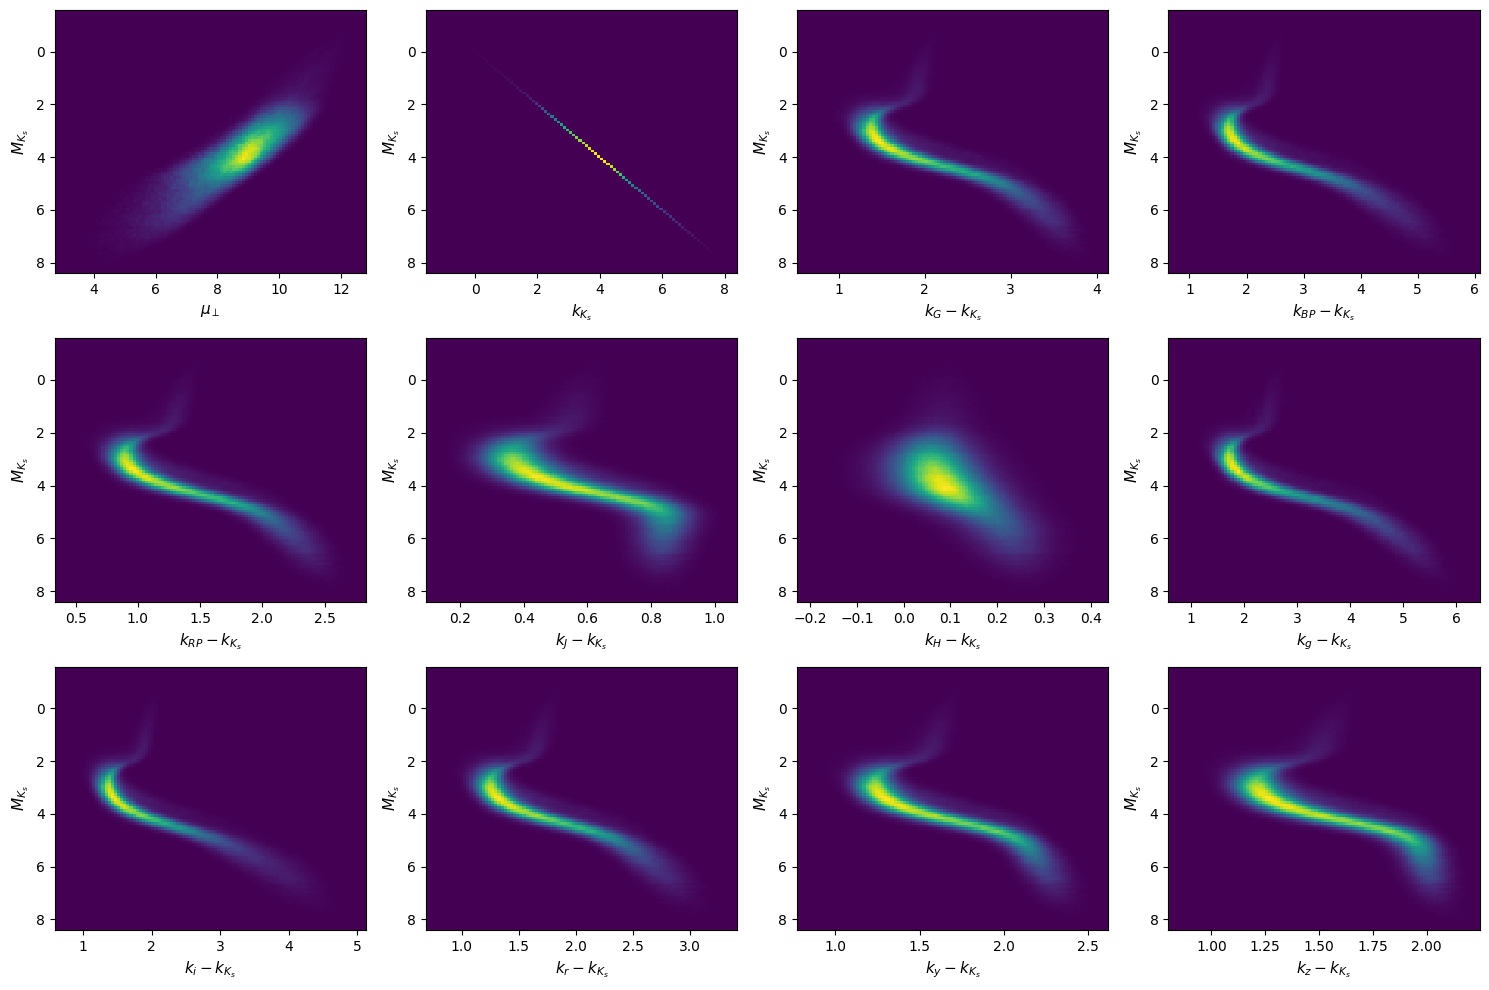

In [5]:

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

# Define the y-axis labels
y_labels = [r'$\mu_\perp$',r'$k_{K_s}$',r'$k_G-k_{K_s}$', r'$k_{BP}-k_{K_s}$', r'$k_{RP}-k_{K_s}$', r'$k_J-k_{K_s}$',r'$k_H-k_{K_s}$', r'$k_{g}-k_{K_s}$', r'$k_i-k_{K_s}$',r'$k_r-k_{K_s}$', r'$k_{y}-k_{K_s}$', r'$k_{z}-k_{K_s}$']

# Plot the data and label the axes
for i in range(12):
    axes[i].hist2d(data_array[:,i],data_array[:,1],bins=100)
    axes[i].set_xlabel(y_labels[i],fontsize=11)  # Set the y-axis label for each subplot
    axes[i].set_ylabel('$M_{K_s}$',fontsize=11)
    axes[i].invert_yaxis()
# Ensure the layout is tight and avoid overlapping of plots


plt.tight_layout()

# Display the figure
plt.show()

### Below I am showing the same plots except with the individual points. The top right corner I have zoomed into areas of the HR diagram that I care about. In particlar, top row, third image, I have zoomed into the turnoff. There are spurious points around here that have survived my cuts. I need to be careful here. My model is extremely good at learning "what stars do we expect to see", my logic is that if these are stars we expect to see then I should include in my model. Moreover, in the last image on the second row, we see many stars spread away from the thick main sequence. I think these are either binary stars(?) or I have chosen my sample incorrectly and i have stars with genuine extinction. If it is the case of binary stars does it make sense to keep these in. Otherwise if we observe a star the extinction will be assigned as being high. However, including these binary stars in my model will allow it to understand that there is significant probability at this part of the HR diagram for finding these type of stars.

INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral


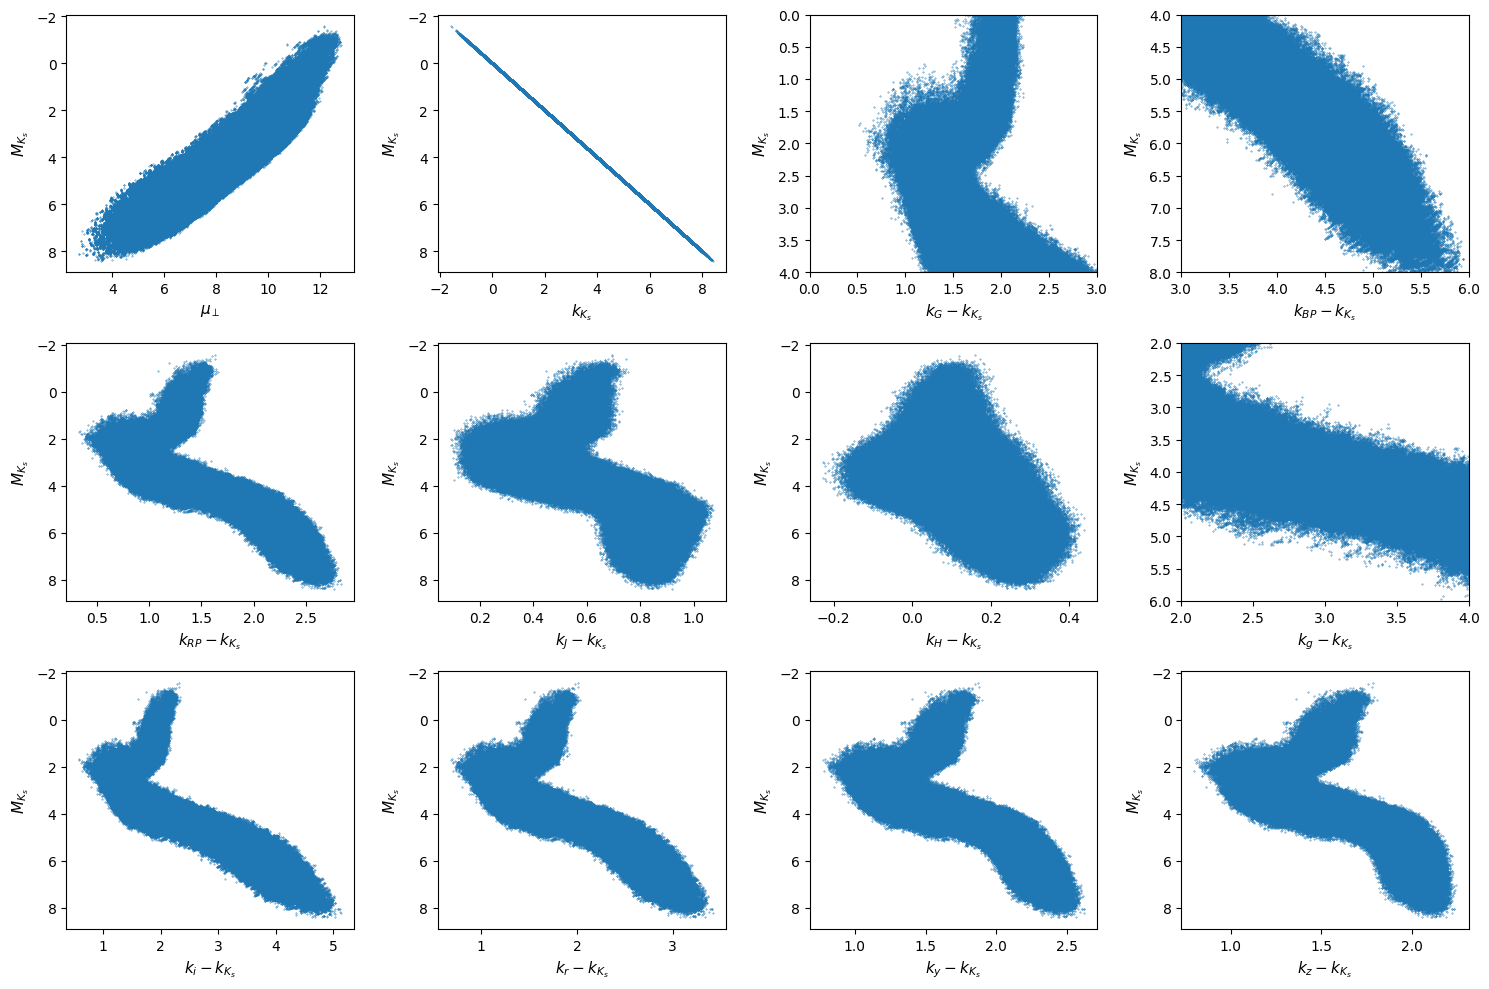

In [6]:

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

# Define the y-axis labels
y_labels = [r'$\mu_\perp$',r'$k_{K_s}$',r'$k_G-k_{K_s}$', r'$k_{BP}-k_{K_s}$', r'$k_{RP}-k_{K_s}$', r'$k_J-k_{K_s}$',r'$k_H-k_{K_s}$', r'$k_{g}-k_{K_s}$', r'$k_i-k_{K_s}$',r'$k_r-k_{K_s}$', r'$k_{y}-k_{K_s}$', r'$k_{z}-k_{K_s}$']

# Plot the data and label the axes
for i in range(12):
    axes[i].scatter(data_array[:,i],data_array[:,1],s=0.1)
    axes[i].set_xlabel(y_labels[i],fontsize=11)  # Set the y-axis label for each subplot
    axes[i].set_ylabel('$M_{K_s}$',fontsize=11)
    axes[i].invert_yaxis()
# Ensure the layout is tight and avoid overlapping of plots
axes[7].set_xlim(2,4)
axes[7].set_ylim(6,2)

axes[2].set_xlim(0,3)
axes[2].set_ylim(4,0)

axes[3].set_xlim(3,6)
axes[3].set_ylim(8,4)

plt.tight_layout()

# Display the figure
plt.show()

INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral


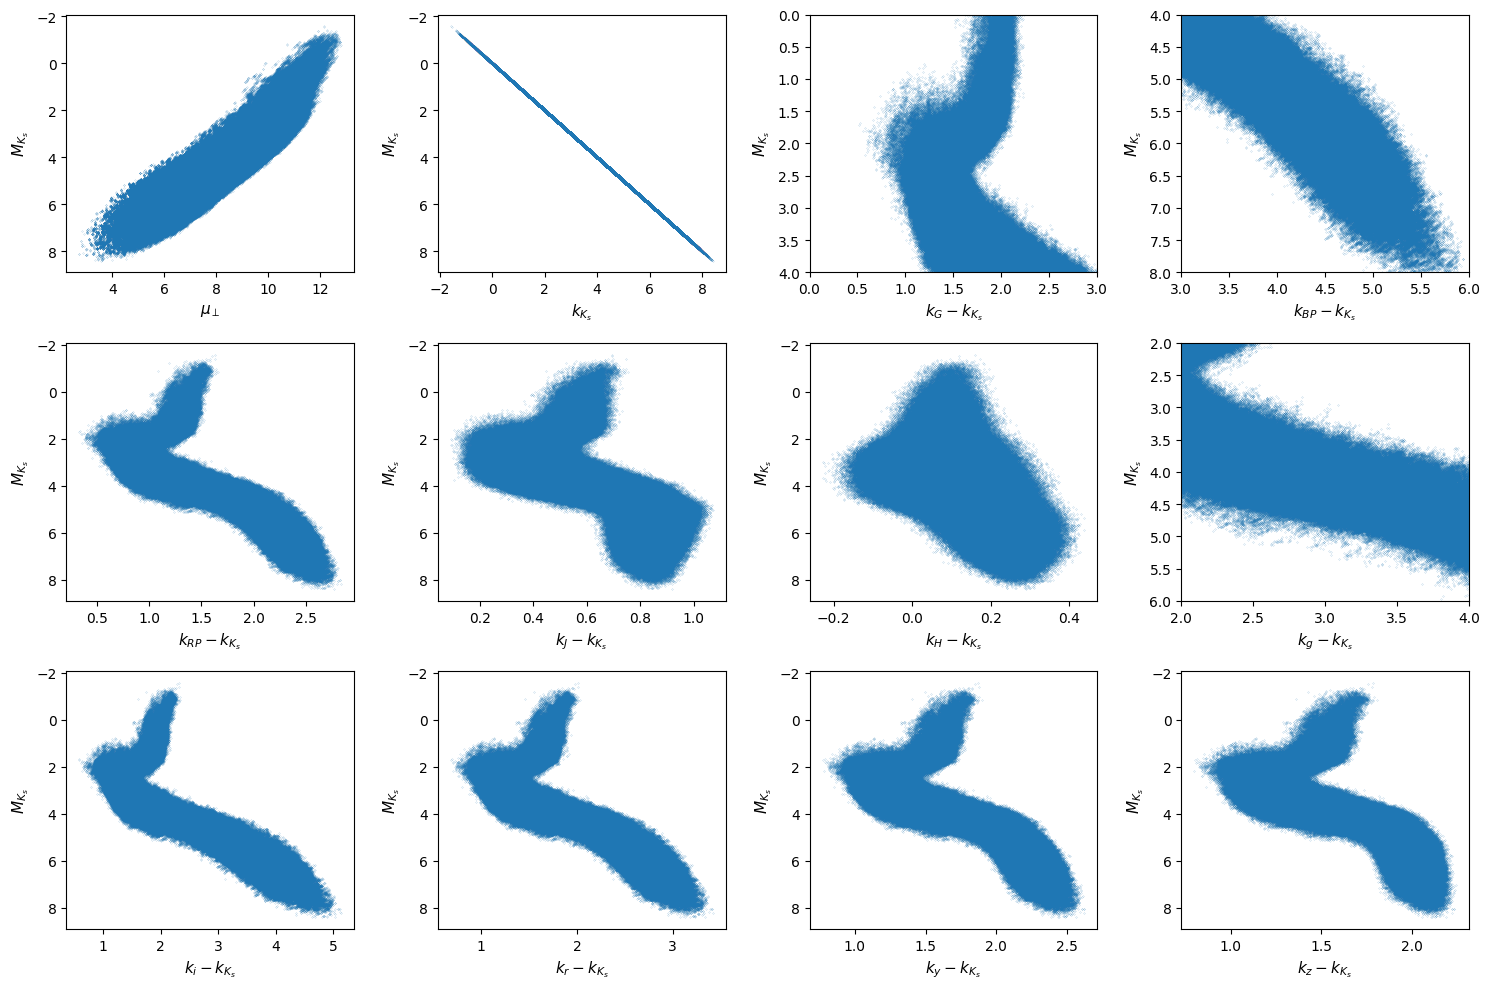

In [7]:

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

# Define the y-axis labels
y_labels = [r'$\mu_\perp$',r'$k_{K_s}$',r'$k_G-k_{K_s}$', r'$k_{BP}-k_{K_s}$', r'$k_{RP}-k_{K_s}$', r'$k_J-k_{K_s}$',r'$k_H-k_{K_s}$', r'$k_{g}-k_{K_s}$', r'$k_i-k_{K_s}$',r'$k_r-k_{K_s}$', r'$k_{y}-k_{K_s}$', r'$k_{z}-k_{K_s}$']

# Plot the data and label the axes
for i in range(12):
    axes[i].scatter(data_array[:,i],data_array[:,1],s=0.01)
    axes[i].set_xlabel(y_labels[i],fontsize=11)  # Set the y-axis label for each subplot
    axes[i].set_ylabel('$M_{K_s}$',fontsize=11)
    axes[i].invert_yaxis()
# Ensure the layout is tight and avoid overlapping of plots
axes[7].set_xlim(2,4)
axes[7].set_ylim(6,2)

axes[2].set_xlim(0,3)
axes[2].set_ylim(4,0)

axes[3].set_xlim(3,6)
axes[3].set_ylim(8,4)

plt.tight_layout()

# Display the figure
plt.show()

# Finally, I display the colour colour relations

Here in the colour colour relations we see some spread from the thick band.

INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral


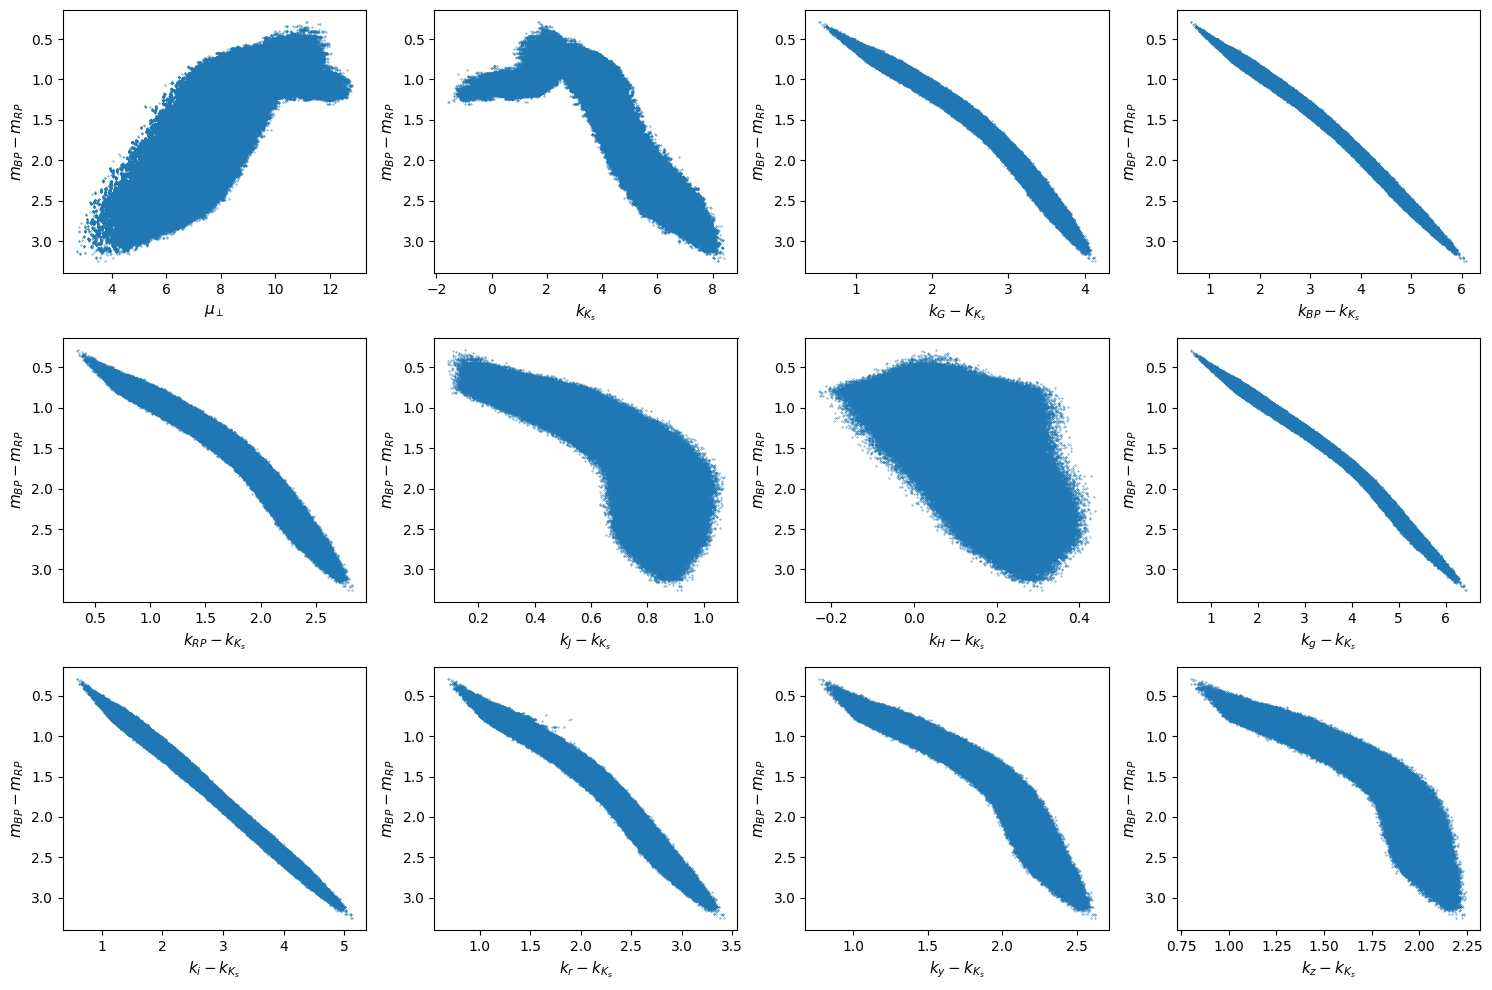

In [8]:

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

# Define the y-axis labels
y_labels = [r'$\mu_\perp$',r'$k_{K_s}$',r'$k_G-k_{K_s}$', r'$k_{BP}-k_{K_s}$', r'$k_{RP}-k_{K_s}$', r'$k_J-k_{K_s}$',r'$k_H-k_{K_s}$', r'$k_{g}-k_{K_s}$', r'$k_i-k_{K_s}$',r'$k_r-k_{K_s}$', r'$k_{y}-k_{K_s}$', r'$k_{z}-k_{K_s}$']

# Plot the data and label the axes
for i in range(12):
    axes[i].scatter(data_array[:,i],data_array[:,3]-data_array[:,4],s=0.1)
    axes[i].set_xlabel(y_labels[i],fontsize=11)  # Set the y-axis label for each subplot
    axes[i].set_ylabel('$m_{BP}-m_{RP}$',fontsize=11)
    axes[i].invert_yaxis()
# Ensure the layout is tight and avoid overlapping of plots


plt.tight_layout()

# Display the figure
plt.show()

Things which I am following other papers on but I prehaps lack expertise which could cause issues for some stars:
1) Cross match
2) apperant magnitude cuts
3) parallax treatment
4) ruwe cut (<1.4)



# Make some more precise cuts

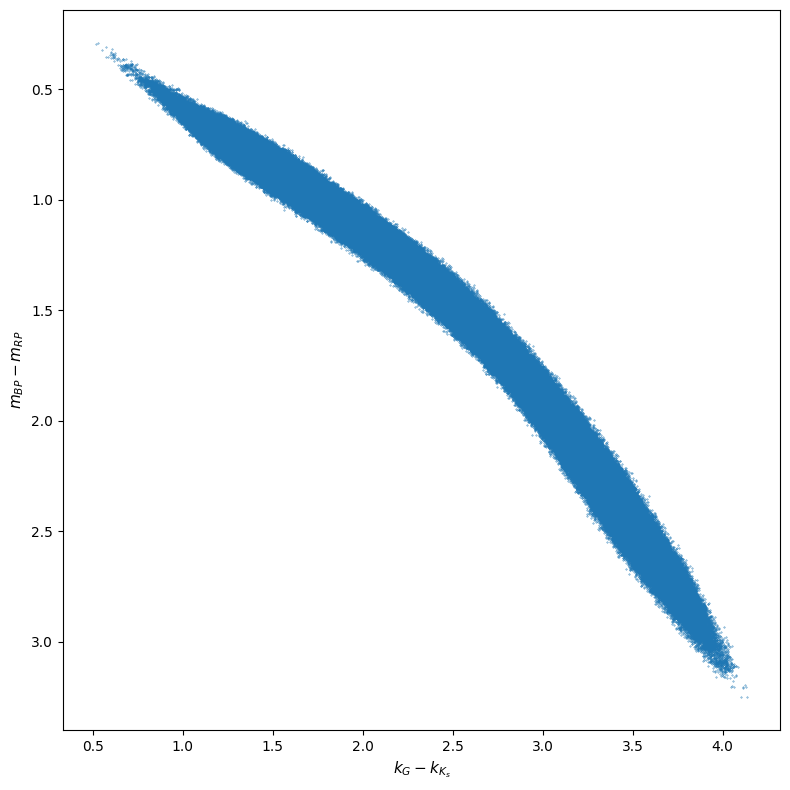

In [9]:

fig, axes = plt.subplots(1, 1, figsize=(8, 8))
axes = [axes]#.flatten()

# Define the y-axis labels
y_labels = [r'$\mu_\perp$',r'$k_{K_s}$',r'$k_G-k_{K_s}$', r'$k_{BP}-k_{K_s}$', r'$k_{RP}-k_{K_s}$', r'$k_J-k_{K_s}$',r'$k_H-k_{K_s}$', r'$k_{g}-k_{K_s}$', r'$k_i-k_{K_s}$',r'$k_r-k_{K_s}$', r'$k_{y}-k_{K_s}$', r'$k_{z}-k_{K_s}$']

# Plot the data and label the axes
for i in range(1):
    axes[i].scatter(data_array[:,2],data_array[:,3]-data_array[:,4],s=0.1)
    axes[i].set_xlabel(y_labels[2],fontsize=11)  # Set the y-axis label for each subplot
    axes[i].set_ylabel('$m_{BP}-m_{RP}$',fontsize=11)
    axes[i].invert_yaxis()
# Ensure the layout is tight and avoid overlapping of plots


plt.tight_layout()

# Display the figure
plt.show()

In [10]:
data_array_check=(nf.data)
data_array_check=data_array_check#[:len(data_array_check)//32]
p=[nf.flow.log_prob(data_array_check[i*len(data_array_check)//32:(i+1)*len(data_array_check)//32]) for i in range(32)]

In [11]:
p=np.concatenate(p,0)

In [12]:
#np.save('/Users/mattocallaghan/XPNorm/Data/prob_low_ext',np.array(p))

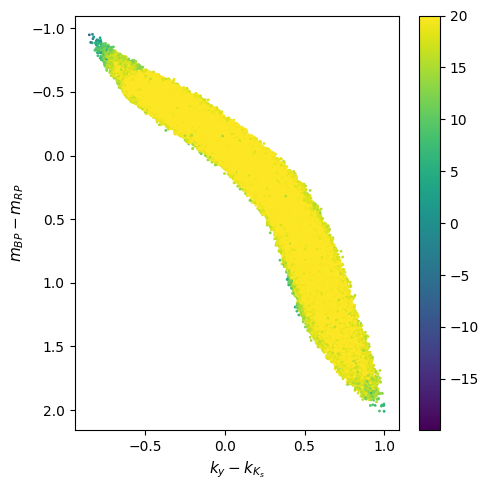

In [13]:

fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes = [axes]#.flatten()

# Define the y-axis labels
y_labels = [r'$\mu_\perp$',r'$k_{K_s}$',r'$k_G-k_{K_s}$', r'$k_{BP}-k_{K_s}$', r'$k_{RP}-k_{K_s}$', r'$k_J-k_{K_s}$',r'$k_H-k_{K_s}$', r'$k_{g}-k_{K_s}$', r'$k_i-k_{K_s}$',r'$k_r-k_{K_s}$', r'$k_{y}-k_{K_s}$', r'$k_{z}-k_{K_s}$']

# Plot the data and label the axes
for i in range(1):
    a=axes[i].scatter(data_array_check[:,-2],data_array_check[:,3]-data_array_check[:,4],c=p,s=1,vmax=20)
    axes[i].set_xlabel(y_labels[-2],fontsize=11)  # Set the y-axis label for each subplot
    axes[i].set_ylabel('$m_{BP}-m_{RP}$',fontsize=11)
    axes[i].invert_yaxis()
    plt.colorbar(a)
# Ensure the layout is tight and avoid overlapping of plots


plt.tight_layout()

# Display the figure
plt.show()

# We can make a cut on the data to remove points.

INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral


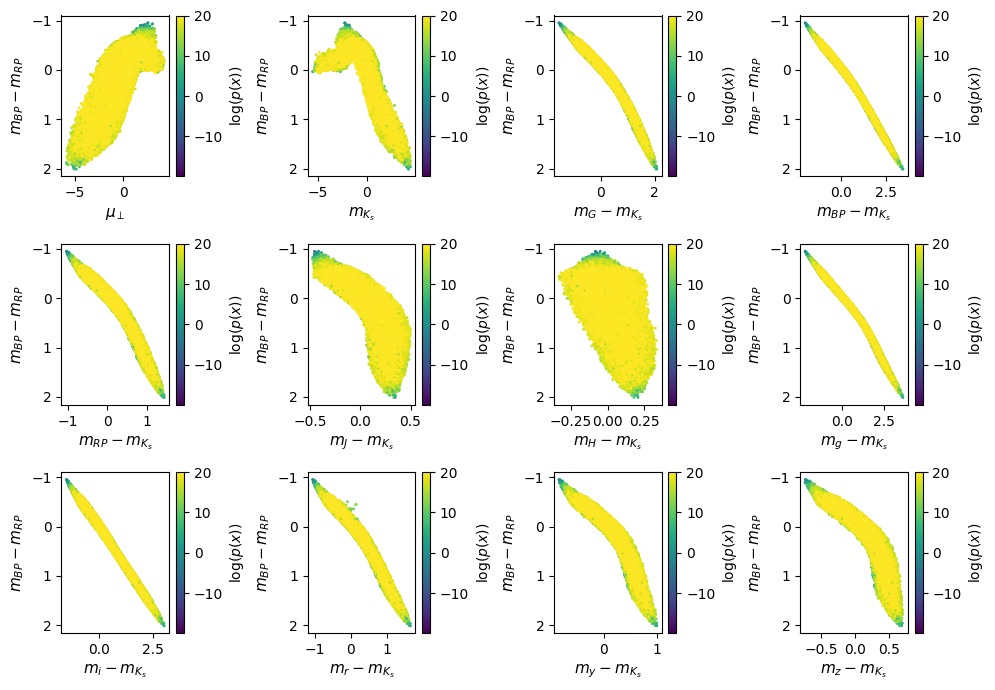

In [14]:

fig, axes = plt.subplots(3, 4, figsize=(10, 7))
axes = axes.flatten()

# Define the y-axis labels
y_labels = [r'$\mu_\perp$',r'$m_{K_s}$',r'$m_G-m_{K_s}$', r'$m_{BP}-m_{K_s}$', r'$m_{RP}-m_{K_s}$', r'$m_J-m_{K_s}$',r'$m_H-m_{K_s}$', r'$m_{g}-m_{K_s}$', r'$m_i-m_{K_s}$',r'$m_r-m_{K_s}$', r'$m_{y}-m_{K_s}$', r'$m_{z}-m_{K_s}$']

# Plot the data and label the axes
for i in range(12):
    a=axes[i].scatter(data_array_check[:,i],data_array_check[:,3]-data_array_check[:,4],s=1,c=p,vmax=20)
    plt.colorbar(a,label='log($p(x)$)')
    axes[i].set_xlabel(y_labels[i],fontsize=11)  # Set the y-axis label for each subplot
    axes[i].set_ylabel('$m_{BP}-m_{RP}$',fontsize=11)
    axes[i].invert_yaxis()
# Ensure the layout is tight and avoid overlapping of plots


plt.tight_layout()

# Display the figure
plt.show()

# After making the cut:

INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral


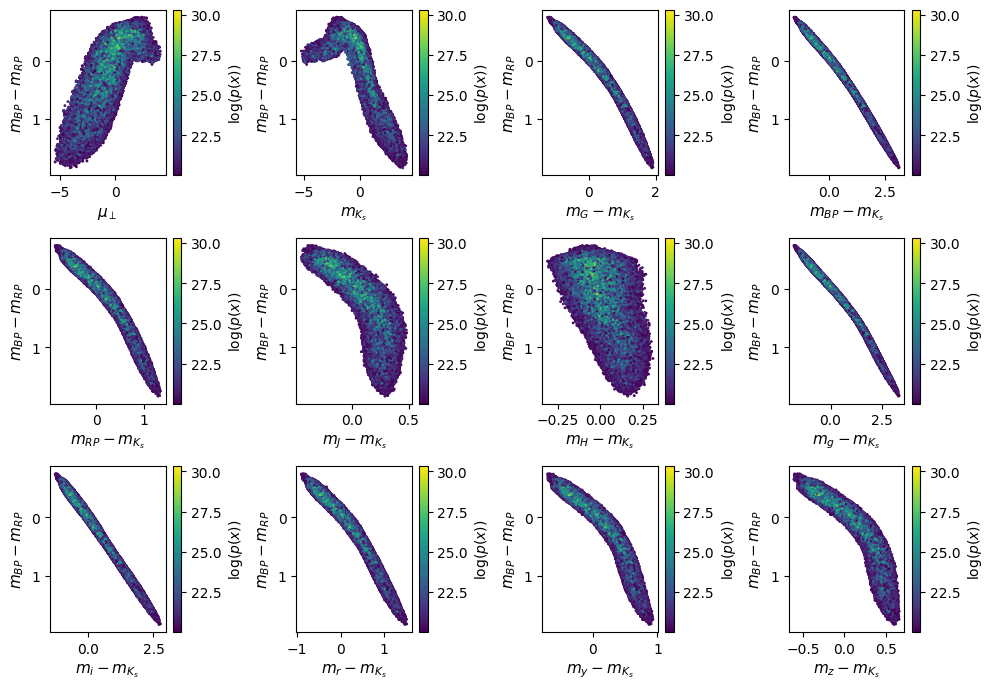

In [15]:

fig, axes = plt.subplots(3, 4, figsize=(10, 7))
axes = axes.flatten()

# Define the y-axis labels
y_labels = [r'$\mu_\perp$',r'$m_{K_s}$',r'$m_G-m_{K_s}$', r'$m_{BP}-m_{K_s}$', r'$m_{RP}-m_{K_s}$', r'$m_J-m_{K_s}$',r'$m_H-m_{K_s}$', r'$m_{g}-m_{K_s}$', r'$m_i-m_{K_s}$',r'$m_r-m_{K_s}$', r'$m_{y}-m_{K_s}$', r'$m_{z}-m_{K_s}$']

idxs=(p>20)
# Plot the data and label the axes
for i in range(12):
    a=axes[i].scatter(data_array_check[idxs,i],data_array_check[idxs,3]-data_array_check[idxs,4],s=1,c=p[idxs])
    plt.colorbar(a,label='log($p(x)$)')
    axes[i].set_xlabel(y_labels[i],fontsize=11)  # Set the y-axis label for each subplot
    axes[i].set_ylabel('$m_{BP}-m_{RP}$',fontsize=11)
    axes[i].invert_yaxis()
# Ensure the layout is tight and avoid overlapping of plots


plt.tight_layout()

# Display the figure
plt.show()

INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral


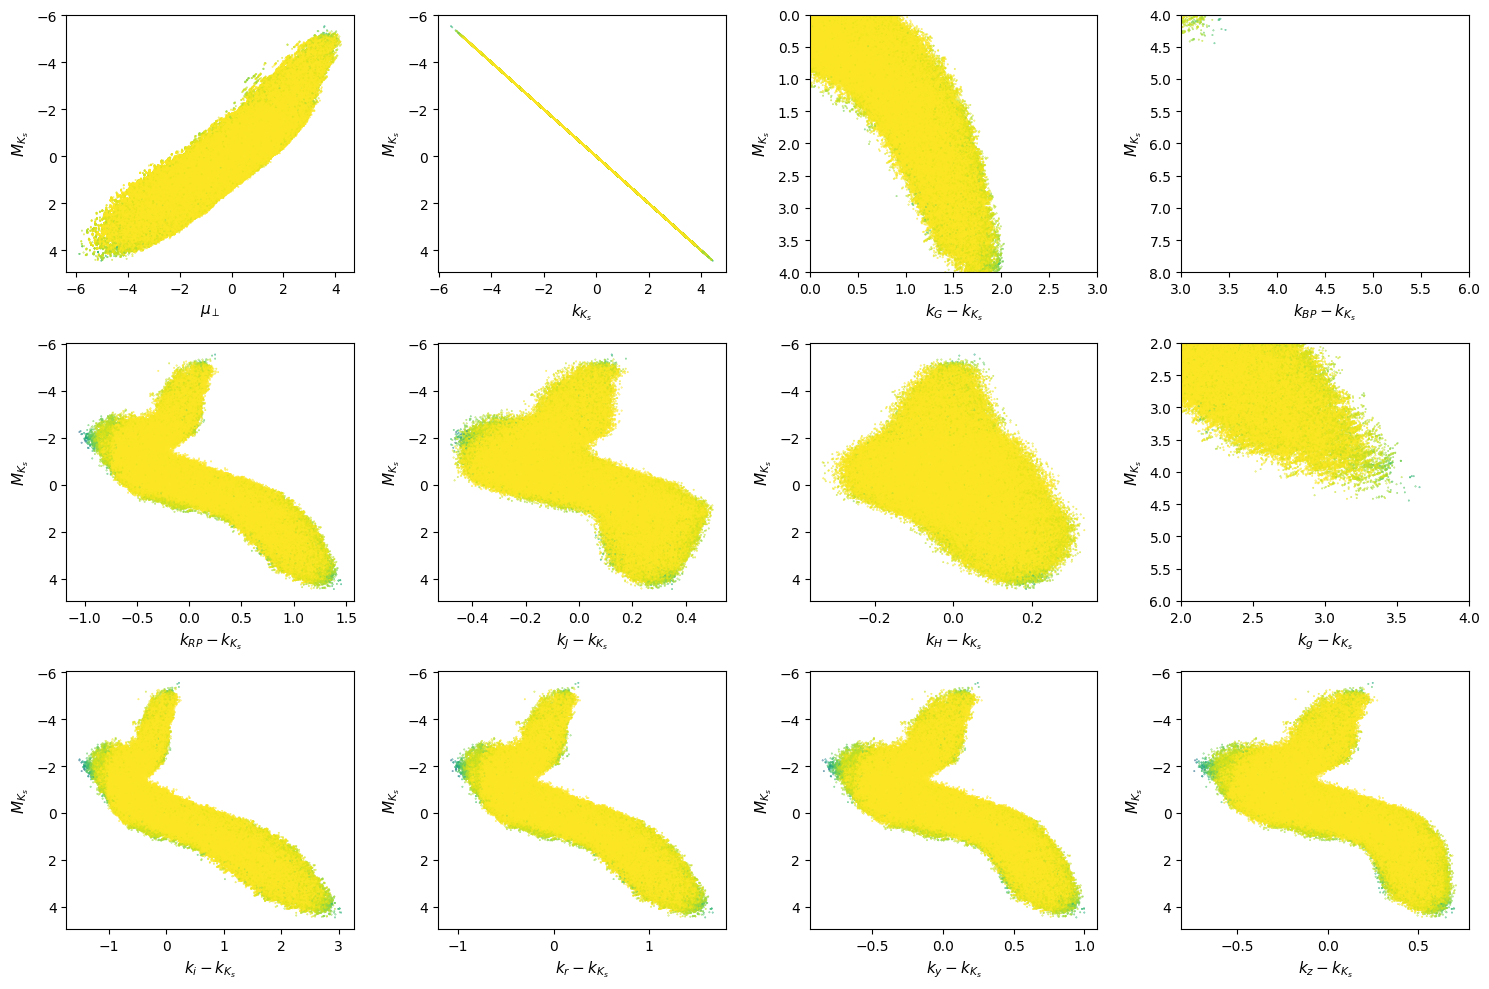

In [16]:

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

# Define the y-axis labels
y_labels = [r'$\mu_\perp$',r'$k_{K_s}$',r'$k_G-k_{K_s}$', r'$k_{BP}-k_{K_s}$', r'$k_{RP}-k_{K_s}$', r'$k_J-k_{K_s}$',r'$k_H-k_{K_s}$', r'$k_{g}-k_{K_s}$', r'$k_i-k_{K_s}$',r'$k_r-k_{K_s}$', r'$k_{y}-k_{K_s}$', r'$k_{z}-k_{K_s}$']

# Plot the data and label the axes
for i in range(12):
    axes[i].scatter(data_array_check[:,i],data_array_check[:,1],s=0.1,c=p,vmax=20)
    axes[i].set_xlabel(y_labels[i],fontsize=11)  # Set the y-axis label for each subplot
    axes[i].set_ylabel('$M_{K_s}$',fontsize=11)
    axes[i].invert_yaxis()
# Ensure the layout is tight and avoid overlapping of plots
axes[7].set_xlim(2,4)
axes[7].set_ylim(6,2)

axes[2].set_xlim(0,3)
axes[2].set_ylim(4,0)

axes[3].set_xlim(3,6)
axes[3].set_ylim(8,4)

plt.tight_layout()

# Display the figure
plt.show()

# Sample Efficiency

In [17]:
from src.NF_Cos_dist import JaxNormFlow
j=JaxNormFlow()

8164992
7558434


In [18]:
j=nf

In [19]:
import seaborn as sn
import jax.numpy as jnp
import jax.random as jr
samples=[j.flow.sample(jr.PRNGKey(0),sample_shape=(100000,)) for _ in range(9)]


In [20]:
samples=jnp.concatenate(samples,0)

In [21]:
samples=samples+j.mean#*j.std
real=j.data+j.mean#*j.std+j.mean
real=real

INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral


<Figure size 1800x900 with 0 Axes>

INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral


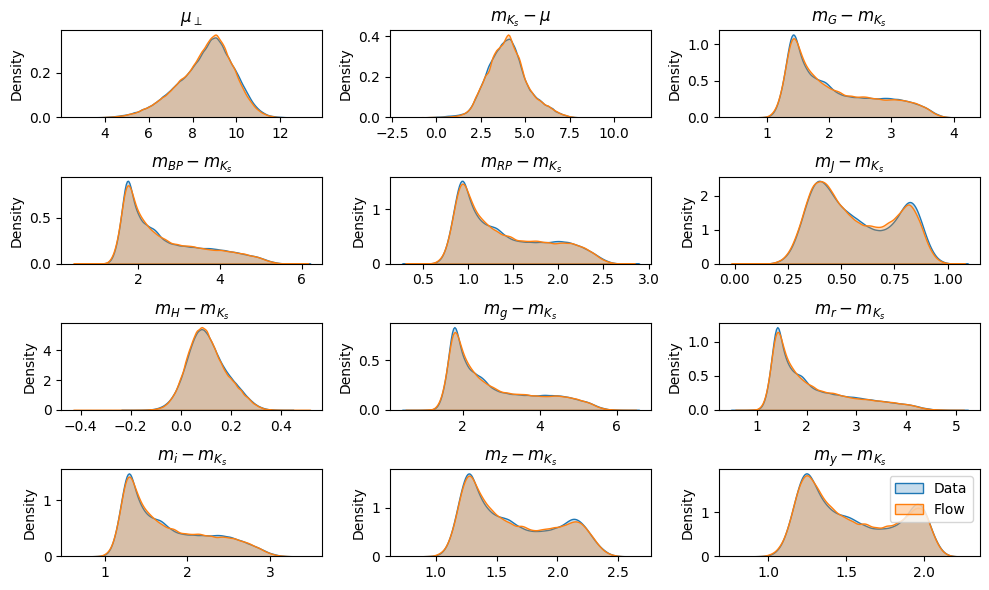

In [22]:
import seaborn as sn
import matplotlib.pyplot as plt
x=samples
plt.figure(figsize=(18, 9))  # Adjust the figure size as needed for your paper layout
fig,axes=plt.subplots(4,3)
axes=axes.flatten()
fig.set_figheight(6)
fig.set_figwidth(10)
sn.kdeplot((real[:,0]),label='Data',ax=axes[0],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,0],label='Flow',ax=axes[0],fill=True,alpha=0.3)

sn.kdeplot(real[:,1],label='Data',ax=axes[1],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,1],label='Flow',ax=axes[1],fill=True,alpha=0.3)

sn.kdeplot(real[:,2],label='Data',ax=axes[2],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,2],label='Flow',ax=axes[2],fill=True,alpha=0.3)

sn.kdeplot(real[:,3],label='Data',ax=axes[3],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,3],label='Flow',ax=axes[3],fill=True,alpha=0.3)

sn.kdeplot(real[:,4],label='Data',ax=axes[4],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,4],label='Flow',ax=axes[4],fill=True,alpha=0.3)

sn.kdeplot(real[:,5],label='Data',ax=axes[5],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,5],label='Flow',ax=axes[5],fill=True,alpha=0.3)

sn.kdeplot((real[:,6]),label='Data',ax=axes[6],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,6],label='Flow',ax=axes[6],fill=True,alpha=0.3)

sn.kdeplot(real[:,7],label='Data',ax=axes[7],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,7],label='Flow',ax=axes[7],fill=True,alpha=0.3)

sn.kdeplot(real[:,8],label='Data',ax=axes[8],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,8],label='Flow',ax=axes[8],fill=True,alpha=0.3)

sn.kdeplot(real[:,9],label='Data',ax=axes[9],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,9],label='Flow',ax=axes[9],fill=True,alpha=0.3)

sn.kdeplot(real[:,10],label='Data',ax=axes[10],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,10],label='Flow',ax=axes[10],fill=True,alpha=0.3)

sn.kdeplot(real[:,11],label='Data',ax=axes[11],fill=True)  # Adjust the colormap as needed
sn.kdeplot(x[:,11],label='Flow',ax=axes[11],fill=True,alpha=0.3)


#sn.kdeplot(nf.data[:,6]+nf.mean[6],label='Data',ax=axes[6],fill=True)  # Adjust the colormap as needed
#sn.kdeplot(x[:,6],label='Flow',ax=axes[6],fill=True,alpha=0.3)

#sn.kdeplot(nf.data[:,3]+nf.mean[3]-(nf.data[:,2]+nf.mean[2]),label='Data',ax=axes[7],fill=True)  # Adjust the colormap as needed
#sn.kdeplot(x[:,3]-x[:,2],label='Flow',ax=axes[7],fill=True,alpha=0.3)

#sn.kdeplot(nf.data[:,-1]+nf.mean[-1]+(nf.data[:,1]+nf.mean[1]),label='Data',ax=axes[8],fill=True)  # Adjust the colormap as needed
#sn.kdeplot(x[:,-1]+x[:,1],label='Flow',ax=axes[8],fill=True,alpha=0.3)

#axes[0].set_title('$\mu$', fontsize=12)  # Adjust the label and font size as needed
axes[0].set_title('$\mu_\perp$', fontsize=12)  # Adjust the label and font size as needed

axes[0+1].set_title('$m_{K_s}-\mu$', fontsize=12)  # Adjust the label and font size as needed
axes[1+1].set_title('$m_{G}-m_{K_s}$', fontsize=12)  # Adjust the label and font size as needed
axes[2+1].set_title('$m_{BP}-m_{K_s}$', fontsize=12)  # Adjust the label and font size as needed
axes[3+1].set_title('$m_{RP}-m_{K_s}$', fontsize=12)  # Adjust the label and font size as needed
axes[4+1].set_title('$m_{J}-m_{K_s}$', fontsize=12)  # Adjust the label and font size as needed
axes[5+1].set_title('$m_{H}-m_{K_s}$', fontsize=12)  # Adjust the label and font size as needed
axes[6+1].set_title('$m_{g}-m_{K_s}$', fontsize=12)  # Adjust the label and font size as needed
axes[7+1].set_title('$m_{r}-m_{K_s}$', fontsize=12)  # Adjust the label and font size as needed
axes[8+1].set_title('$m_{i}-m_{K_s}$', fontsize=12)  # Adjust the label and font size as needed
axes[9+1].set_title('$m_{z}-m_{K_s}$', fontsize=12)  # Adjust the label and font size as needed
axes[10+1].set_title('$m_{y}-m_{K_s}$', fontsize=12)  # Adjust the label and font size as needed

#axes[7].set_title('$m_{BP}-m_{RP}$', fontsize=12)  # Adjust the label and font size as needed
#axes[8].set_title('$m_{K}-\mu$', fontsize=12)  # Adjust the label and font size as needed

plt.legend()
# Adding a colorbar for better interpretation of the histogram
#cbar = plt.colorbar()
#cbar.set_label('N Stars', fontsize=12)  # Adjust the label and font size as needed
plt.tight_layout()
# Saving the plot
#plt.savefig('/Users/mattocallaghan/XPNorm/Plots/par_compare.png', bbox_inches='tight')  # Adjust filename and DPI as needed
#plt.savefig('/Users/mattocallaghan/XPNorm/Plots/par_compare.pdf', bbox_inches='tight')  # Adjust filename and DPI as needed

plt.show()

In [23]:
samp=samples#[:len(samples)//10]

INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral
INFO:matplotlib.mathtext:Substituting symbol \perp from STIXGeneral


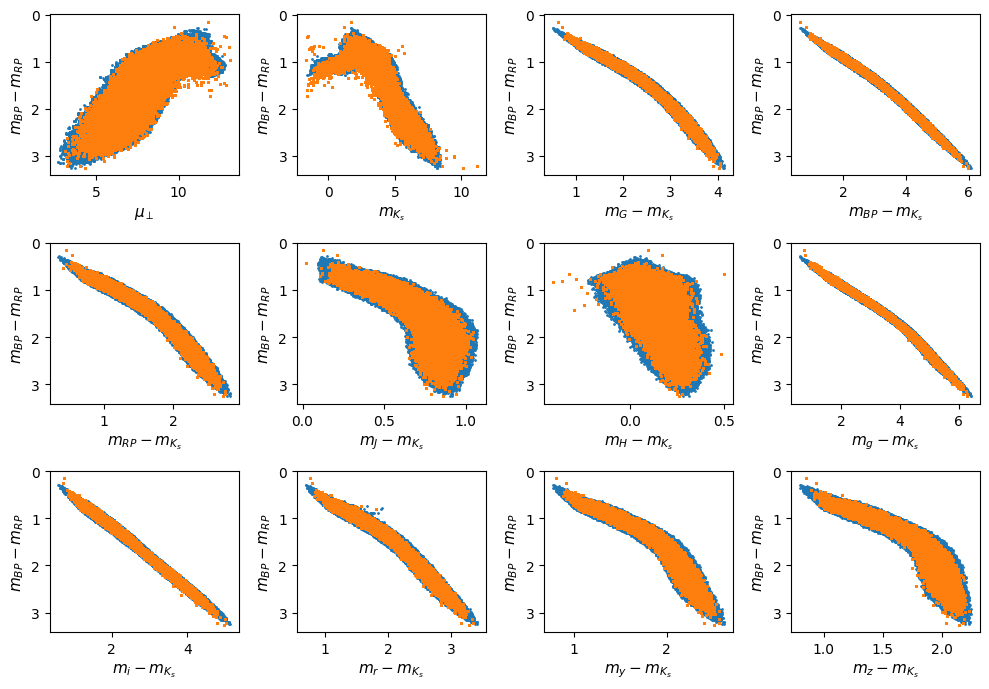

In [24]:

fig, axes = plt.subplots(3, 4, figsize=(10, 7))
axes = axes.flatten()

# Define the y-axis labels
y_labels = [r'$\mu_\perp$',r'$m_{K_s}$',r'$m_G-m_{K_s}$', r'$m_{BP}-m_{K_s}$', r'$m_{RP}-m_{K_s}$', r'$m_J-m_{K_s}$',r'$m_H-m_{K_s}$', r'$m_{g}-m_{K_s}$', r'$m_i-m_{K_s}$',r'$m_r-m_{K_s}$', r'$m_{y}-m_{K_s}$', r'$m_{z}-m_{K_s}$']

# Plot the data and label the axes
for i in range(12):
    axes[i].scatter(real[:,i],real[:,3]-real[:,4],s=1)
    axes[i].scatter(samples[:,i],samples[:,3]-samples[:,4],s=1)
    axes[i].set_xlabel(y_labels[i],fontsize=11)  # Set the y-axis label for each subplot
    axes[i].set_ylabel('$m_{BP}-m_{RP}$',fontsize=11)
    axes[i].invert_yaxis()
# Ensure the layout is tight and avoid overlapping of plots


plt.tight_layout()

# Display the figure
plt.show()

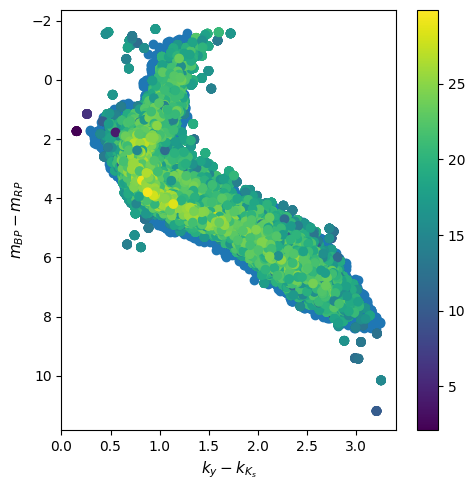

In [25]:

fig, axes = plt.subplots(1, 1, figsize=(5, 5))
axes = [axes]#.flatten()

# Define the y-axis labels
y_labels = [r'$\mu_\perp$',r'$k_{K_s}$',r'$k_G-k_{K_s}$', r'$k_{BP}-k_{K_s}$', r'$k_{RP}-k_{K_s}$', r'$k_J-k_{K_s}$',r'$k_H-k_{K_s}$', r'$k_{g}-k_{K_s}$', r'$k_i-k_{K_s}$',r'$k_r-k_{K_s}$', r'$k_{y}-k_{K_s}$', r'$k_{z}-k_{K_s}$']
samp=samples
p=j.flow.log_prob(samp-j.mean)
# Plot the data and label the axes
for i in range(1):
    a=axes[i].scatter(real[:,3]-real[:,4],real[:,1])

    a=axes[i].scatter(samp[:,3]-samp[:,4],samp[:,1],c=p)
    plt.colorbar(a)
    axes[i].set_xlabel(y_labels[-2],fontsize=11)  # Set the y-axis label for each subplot
    axes[i].set_ylabel('$m_{BP}-m_{RP}$',fontsize=11)
    axes[i].invert_yaxis()
# Ensure the layout is tight and avoid overlapping of plots


plt.tight_layout()

# Display the figure
plt.show()